In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import lavaburst

### Example usage of some callers

In [2]:
import TADcalling
TADcalling.logger.setLevel('INFO')

In [4]:
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
IS.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [6]:
DI = TADcalling.CallerClasses.DirectionalityCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [7]:
DI.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [8]:
lc = TADcalling.CallerClasses.LavaburstCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [9]:
lc.call({'gamma':np.arange(-5,6,0.1), 'method':['armatus', 'modularity']})

In [10]:
acpp = TADcalling.CallerClasses.ArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [16]:
acpp.call({'gamma':[0.1, 0.3, 0.5]}, caller_path='')

In [10]:
df_lc = lc.segmentation2df()
df_is = IS.segmentation2df()
df_di = DI.segmentation2df()

df = pd.concat([x.segmentation2df() for x in [lc, IS, DI]])

In [11]:
df[0:5]

,bgn,caller,cutoff,end,gamma,label,method,window
0,0,Lavaburst,NaN,677,-5.0,S2,armatus,NaN
1,677,Lavaburst,NaN,682,-5.0,S2,armatus,NaN
2,682,Lavaburst,NaN,1151,-5.0,S2,armatus,NaN
0,0,Lavaburst,NaN,1151,-5.0,S2,modularity,NaN
0,0,Lavaburst,NaN,676,-4.9,S2,armatus,NaN


In [12]:
df.loc[:,'length'] = df.end-df.bgn

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/anaconda3/envs/distiller-editable/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


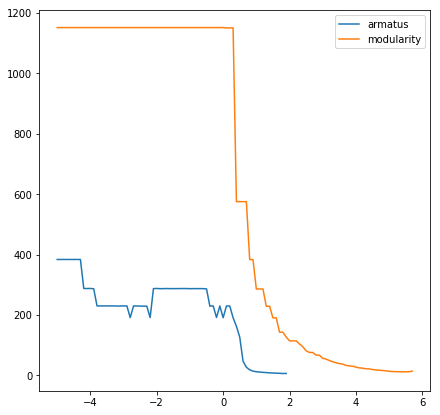

In [13]:
gr = df.query('caller=="Lavaburst"').groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
plt.figure(figsize=[7,7])
for method in ['armatus', 'modularity']:
    tmp = gr.query('method=="{}"'.format(method))
    plt.plot( tmp.gamma, tmp.length, label=method )
    
plt.legend()

In [14]:
hc = TADcalling.CallerClasses.HiCsegCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [16]:
hc.call(params_dict={'distr_model':["P"]}, tune=False)

In [6]:
lc.convert_files("txt.gz")

In [18]:
lc._metadata

{'assembly': 'dm3',
 'balance': False,
 'chr': 'chr2L',
 'data_formats': ['cool', 'txt.gz', 'txt.gz'],
 'files_cool': ['./data/S2.20000.cool'],
 'files_txt.gz': ['./data/S2.20000.chr2L.txt.gz'],
 'labels': ['S2'],
 'resolution': 1000,
 'size': 0}

### DEVELOPMENT OF MrTADFinder

In [18]:
mrc = TADcalling.CallerClasses.MrTADFinderCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [22]:
mrc.call(1)

In [3]:
c = cooler.Cooler('./data/S2.20000.cool')

In [4]:
sparse = c.matrix(balance=True, as_pixels=True).fetch('chr2L')

In [5]:
sparse.loc[:, "bin1_id":"bin2_id"] += 1

In [6]:
sparse

,bin1_id,bin2_id,count,balanced
0,1,1,2859,0.892852
1,1,2,382,0.117808
2,1,3,315,0.076218
3,1,4,251,0.051895
4,1,5,109,0.026401
5,1,6,61,0.018097
6,1,7,53,0.019344
7,1,8,39,0.013315
8,1,9,16,0.005216
9,1,10,34,0.009732


In [7]:
sparse.loc[:, 'bin1_id':'count'].to_csv('test_sparse.txt', header=False, index=False, sep='\t')

In [61]:
max_bin = sparse.loc[:, 'bin1_id':'bin2_id'].max().max()

In [77]:
with open("genome_bin.txt", 'w') as outfile:
    outfile.write("1\tchr1\t0\t{}".format(max_bin - 1))

In [79]:
max_bin

1151

In [80]:
with open('chr_bin.txt', 'w') as outfile:
    for i in range(max_bin):
        outfile.write("0\t{}\t{}\n".format(i * 20000 + 1, (i + 1) * 20000))

In [12]:
subprocess.run("julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt", shell=True)

CompletedProcess(args='julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt', returncode=1)

In [13]:
mr_df = pd.read_csv('test_mrtadfinder.csv')

In [17]:
mr_df.loc[:, "domain_st_bin":"domain_ed_bin"].values

array([[42015, 42018],
       [42019, 42035],
       [42036, 42041],
       [42042, 42042],
       [42043, 42043],
       [42044, 42044],
       [42045, 42045],
       [42046, 42046],
       [42047, 42047]])

### Format conversions test


In [15]:
import TADcalling
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [ ]:
IS.convert_files('hic', juicer_path='../juicer_tools.1.8.9_jcuda.0.8.jar', remove_intermediary_files=False)

In [ ]:
IS.convert_files('h5')